## Auxiliary NB for the STATIC method for the vibrational spectrum. Exercise 12

In [2]:
import numpy as np
from math import pi, sqrt
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

from ase import Atoms
from ase.io import read,write
from ase.visualize import view
import nglview

In [17]:
#
# Copying the mol files from daint
#

username  = "course24"

!scp daint.cscs.ch:/scratch/snx3000/{username}/Runs_12/static/*mol .

C6H6-VIBRATIONS-1.ref.mol                     100%   18KB 310.9KB/s   00:00    
MET-VIBRATIONS-1.ref.mol                      100% 4207   167.7KB/s   00:00    


## Functions

Function to read moldenfiles

In [3]:
def read_molden(file):
    
    with open(file) as f:
        data = f.readlines()

    freq = []
    info_atoms = [] # element, x, y, z
    vibr_displacements = [] # [vibration_nr][coord]

    inten = []


    section = ''
    b2A=0.52917721067  #transform bohr to angstrom
    
    # Parse the datafile checking all possible case
    for line in data:
        line = line.strip()

        # check if a new section starts
        if line[0] == '[':
            section = line.strip('[]').lower()
            continue

        if section == 'freq':
            freq.append(float(line))

        if section == 'fr-coord':
            el, x, y, z = line.split()
            info_atoms.append([el, float(x)*b2A, float(y)*b2A, float(z)*b2A])

        if section == 'fr-norm-coord':
            if line.startswith('vibration'):
                vibr_displacements.append([])
                continue
            coords = [float(x) for x in line.split()]
            vibr_displacements[-1].append(coords)

        if section == 'int':
            inten.append(float(line))

    vibr_displacements = np.asanyarray(vibr_displacements)
    info_atoms = np.asanyarray(info_atoms)
    atoms = Atoms(info_atoms[:,0], info_atoms[:,1:4])

    return atoms, freq, vibr_displacements, inten

Function to create trajectories showing the modes

In [4]:
def get_trajectory(mode, mol, disp, enhance_disp):
    
    time_arr = np.linspace(0.0, 2*np.pi, 20)

    trajectory = []
    for time in time_arr:
        vibr_atoms = Atoms(mol.get_chemical_symbols(), mol.positions+enhance_disp*np.sin(time)*disp[mode])
        trajectory.append(vibr_atoms)
    return trajectory

## Program 

Read molden file

In [18]:
file = "C6H6-VIBRATIONS-1.ref.mol"
molecule, frequency, displacements, intensity = read_molden(file)

View atoms at equilibrium

In [19]:
nglview.show_ase(molecule)
#view(molecule)

NGLWidget()

Plot only spectrum

Text(0.5, 0, 'Frequency [cm$^{-1}$]')

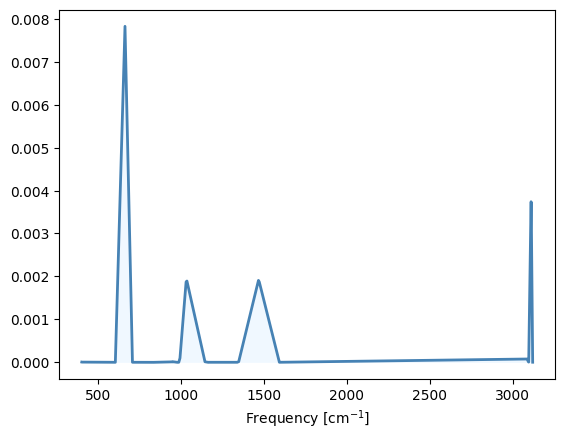

In [20]:
fig, ax = plt.subplots()
ax.plot(frequency,intensity, lw=2,color='steelblue')
ax.fill(frequency,intensity, color='aliceblue')
ax.set_xlabel("Frequency [cm$^{-1}$]")

Plot spectrum and all the identified frequencies

Text(0.5, 1.0, 'Spectrum')

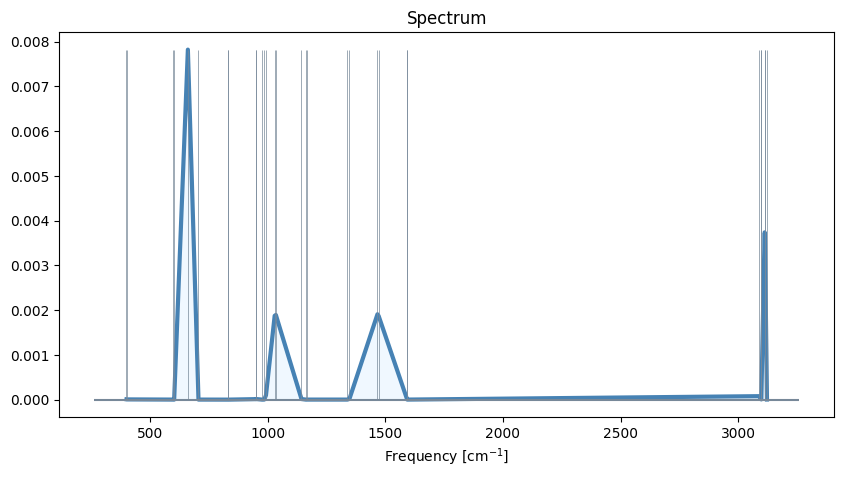

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(frequency,intensity, lw=3,color='steelblue')
ax.fill(frequency,intensity, color='aliceblue')
ax.vlines(frequency,np.zeros(len(frequency)),max(intensity)*np.ones(len(frequency)),color='lightslategray', lw=0.5)
ax.hlines(0,*plt.xlim(),color='lightslategray')
ax.set_xlabel('Frequency [cm$^{-1}$]')
ax.set_title('Spectrum')

In [23]:
j=0
for f, i  in zip(frequency,intensity):
    j=j+1
    print(j, f, i)

1 400.302903 6e-06
2 401.555638 5e-06
3 596.097032 1e-06
4 602.918089 0.0
5 661.189688 0.007824
6 706.249913 1e-06
7 833.568431 0.0
8 833.756231 0.0
9 949.504594 1.1e-05
10 949.976122 1.4e-05
11 976.963838 0.0
12 985.82371 1e-06
13 993.020931 9.8e-05
14 1029.977506 0.001874
15 1035.062465 0.001893
16 1143.899937 1.3e-05
17 1163.64503 0.0
18 1165.969536 1e-06
19 1338.887202 1e-06
20 1347.664359 1.6e-05
21 1466.711983 0.001908
22 1471.797438 0.00187
23 1593.030396 1e-06
24 1594.117474 1e-06
25 3087.283723 7.7e-05
26 3096.781439 8e-06
27 3097.757885 5e-06
28 3111.829664 0.003739
29 3112.819108 0.003726
30 3121.735327 2e-06


## Visualize vibrational mode

In [24]:
mode = 29




trajectory = get_trajectory(mode,molecule, displacements,1.5)
nglv = nglview.show_asetraj(trajectory, gui=True)
nglv

NGLWidget(max_frame=19)